# Overall Aim of project: Investigate Factors that influence a Country’s GDP per capita. 

## Background & Context
GDP per capita is a measure of a country's economic output divided by its population size. It is important to measure it because it gives a good indication of a country's economic health and the standard of living of its citizens. It is also a useful tool for comparing the economic performance of different countries.

Prediction of GDP per capita is important in order to gauge the economic performance of a country over time. It can be used to help inform policy decisions and measure the effects of economic policies. By predicting future GDP per capita, policymakers can better understand the likely effects of their decisions and make more informed decisions.

As data scientists, we must come up with models that can predict GDP per capita in order to help inform policy decisions and measure the performance of economic policies. By using predictive models, data scientists can better understand the likely effects of policy decisions and provide policy makers with important insights into the economic performance of a country. These models also allow for better comparisons between countries and regions.


### **The objectives:**
* Explore and visualize the dataset.
* Build a model to predict the GDP per Capita.
* Generate a set of insights and recommendations that will help countries in their GDP forecasting and predictions.

### **The key questions:**
* Which factors would affect the GDP per Capita of a country?
* Is there any difference between the poor and rich?
* Do poor countries grow faster than rich countries? 

### **The problem formulation**:
We have a regression problem at hand where we will try to predict the GDP per capita based on several factors derived from our dataset from World Bank and IMF

### **Data**

* The World Bank Indicators data: that includes hundreds of economic and social indicators including GDP, population, inflation, labor force, energy use, poverty levels, and education. It also includes data on health, natural resources, and the environment. The data is sourced from a variety of international organizations and can be used to compare the performance of countries and regions on a variety of measures.
* The International Monetary Fund (IMF) data:  that includes economic indicators such as GDP, inflation, exchange rates, public debt, and balance of payments. It also includes data on trade, investment, and financial flows. The data can be used to measure the performance of countries and regions and compare them over time.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import altair as alt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Import libraries to build linear model for statistical analysis and prediction
# import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn import metrics

# for tuning the model
from sklearn.model_selection import GridSearchCV

# to ignore warnings
import warnings

warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)
# Import jupyter dash
from jupyter_dash import JupyterDash
import os

# Import dash
import dash
from dash import dcc
from dash import html

from dash import Dash, html, dcc, Input, Output

# Import plotly
import plotly.graph_objs as go
import plotly.express as px

C:\Users\fkiwanuka\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# enable correct rendering (unnecessary in later versions of Altair)
alt.renderers.enable('default')

# uses intermediate json files to speed things up
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
# Read the files from WDIdata files
# df_series descriptive information regarding the years associated with each series code
# df_data is main data set
df_series = pd.read_csv('WDISeries.csv')
df_country = pd.read_csv('WDICountry.csv')
df_data = pd.read_csv('WDIData.csv')


In [4]:
df_data[df_data['Indicator Code'] == 'NY.GDP.PCAP.CD'].head()

Country Name Country Code  \
474      Africa Eastern and Southern          AFE   
1916      Africa Western and Central          AFW   
3358                      Arab World          ARB   
4800          Caribbean small states          CSS   
6242  Central Europe and the Baltics          CEB   

                    Indicator Name  Indicator Code        1960        1961  \
474   GDP per capita (current US$)  NY.GDP.PCAP.CD  162.726325  162.555968   
1916  GDP per capita (current US$)  NY.GDP.PCAP.CD  107.930722  113.080062   
3358  GDP per capita (current US$)  NY.GDP.PCAP.CD         NaN         NaN   
4800  GDP per capita (current US$)  NY.GDP.PCAP.CD  448.256417  476.901484   
6242  GDP per capita (current US$)  NY.GDP.PCAP.CD         NaN         NaN   

            1962        1963        1964        1965        1966        1967  \
474   172.271022  199.784916  180.228774  199.517228  211.054388  213.636599   
1916  118.829461  123.441089  131.852423  138.524029  144.323882  128.578957   
3358         NaN         NaN         NaN         NaN         NaN         NaN   
4800  494.736372  516.739524  547.950527  580.944136  621.434727  658.350898   
6242         NaN         NaN         NaN         NaN         NaN         NaN   

            1968        1969        1970        1971        1972         1973  \
474   226.621320  252.568635  263.499037  282.574926  297.071741   375.456271   
1916  129.641093  143.715617  195.433544  169.119083  200.168386   241.711405   
3358  304.160518  322.222697  354.311149  398.208802  461.758290   569.986116   
4800  645.928307  695.038982  755.144559  811.131747  925.527534  1000.862363   
6242         NaN         NaN         NaN         NaN         NaN          NaN   

             1974         1975         1976         1977         1978  \
474    451.034688   466.621771   450.652589   496.730542   538.069256   
1916   333.192459   377.788007   444.374374   454.790119   482.477437   
3358  1050.488494  1127.600549  1360.714749  1521.694208  1616.439791   
4800  1285.493303  1485.161329  1511.874938  1736.749154  1759.825020   
6242          NaN          NaN          NaN          NaN          NaN   

             1979         1980         1981         1982         1983  \
474    610.089564   750.769347   745.057665   694.053586   704.898895   
1916   584.373926   718.691796  1316.931512  1136.462411   815.900736   
3358  2126.800962  2796.552260  2793.331402  2536.999792  2318.281359   
4800  1999.188487  2461.655884  2683.655224  2940.212791  2942.719169   
6242          NaN          NaN          NaN          NaN          NaN   

             1984         1985         1986         1987         1988  \
474    626.673685   517.922885   562.694182   666.744127   709.991727   
1916   656.712769   651.509972   584.907280   584.119273   561.361469   
3358  2289.351370  2188.888006  2062.378137  2169.576045  2034.097910   
4800  2778.893347  2722.828275  2466.299099  2633.116445  2775.622222   
6242          NaN          NaN          NaN          NaN          NaN   

             1989         1990         1991         1992         1993  \
474    734.866506   831.202019   872.391306   739.303650   714.009949   
1916   510.419112   594.725717   558.435766   547.662947   445.656045   
3358  2122.543407  2892.697861  2061.480923  2033.922796  2017.897763   
4800  2827.688623  2997.319563  2951.059638  2875.189721  3084.660831   
6242          NaN  2314.688781  2197.245977  2360.946348  2491.012300   

             1994         1995         1996         1997         1998  \
474    705.447265   771.259980   747.767103   765.890061   703.028889   
1916   378.940377   462.864798   523.763417   515.234541   513.642464   
3358  2068.736600  2196.934452  2371.404640  2501.000175  2381.946705   
4800  3214.051810  3514.100743  3803.623288  4421.507074  4690.203950   
6242  2826.235767  3580.354508  3795.829168  3747.756715  4108.446136   

             1999         2000         2001         2002         2003  \


In [5]:
# Let us check out how it looks
df_data.head()

Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1997  1998  1999       2000       2001       2002       2003       2004  \
0   NaN   NaN   NaN  11.435351  11.805706  12.167502  12.533893  12.916778   
1   NaN   NaN   NaN   3.500037   3.692771   3.846867   4.071761   4.314265   
2   NaN   NaN   NaN  32.330196  32.698002  33.145282  33.676838  34.198090   
3   NaN   NaN   NaN  19.811283  19.900569  21.525812  22.474309  23.781918   
4   NaN   NaN   NaN   8.469418        NaN        NaN   9.697171  10.919163   

        2005       2006       2007       2008       2009       2010  \
0  13.351035  13.865804  14.348658  14.764352  15.226159  15.625978   
1   4.537563   4.826155   5.042363   5.312541   5.542820   5.808091   
2  34.721609  35.199741  35.854238  36.242278  36.717076  37.015695   
3  23.487415  24.763538  26.766518  25.934179  26.181557  27.557137   
4  10.385696  12.423710  12.431412  12.888967  15.341002  14.577175   

        2011       2012       2013       2014       2015       2016  \
0  16.128485  16.559819  16.936004  17.337896  17.687093  18.140971   
1   6.058950   6.281667   6.499471   6.680066   6.859110   7.016238   
2  37.329561  37.601816  37.855399  38.046781  38.326255  38.468426   
3  29.089827  31.844384  31.794160  32.001027  33.871910  38.880173   
4  16.222794  19.402592  18.663502  17.633986  16.464681  24.531436   

        2017       2018       2019       2020  2021  Unnamed: 66  
0  18.491344  18.825520  19.272212  19.628009   NaN          NaN  
1   7.180364   7.322294   7.517191   7.651598   NaN          NaN  
2  38.670044  38.722783  38.927016  39.042839   NaN          NaN  
3  40.261358  43.061877  44.270860  45.803485   NaN          NaN  
4  25.345111  27.449908  29.641760  30.404935   NaN          NaN

Regions: AFE Africa Eastern and Southern,AFW Africa Western and Central,ARB Arab World,EAP East Asia & Pacific (excluding high income),EAS East Asia & Pacific,ECA Europe & Central Asia (excluding high income),ECS Europe & Central Asia,EMU Euro area,
EUU European Union,HIC High income,LAC Latin America & Caribbean (excluding high income),LCN Latin America & Caribbean
LDC Least developed countries: UN classification,LIC Low income,LMC Lower middle income,LMY Low & middle income,MEA Middle East & North Africa,MIC Middle income,NAC North America,OED OECD members,SSF Sub-Saharan Africa,UMC Upper middle income,WLD World

In [6]:
regions = ['AFE','AFW','ARB', 'EAP', 'EAS', 'ECA', 'ECS', 'EMU','EUU', 'HIC', 'LAC',
'LCN', 'LDC','LIC','LMC', 'LMY', 'MEA', 'MIC', 'NAC','OED','SSF','UMC', 'WLD']
#poor_regions = ['AFE',#]

In [7]:
# This function does many things at the same time: 
# 1- takes a raw data frame, a country and a keyword and outputs a cleaned data fram of indicators and values
# 2. Does a number of cleaning operations from handling NaN, to transformations of dataframes using
# groupby, melt and pivot tables
def get_country(df):
      
    # groupby to merge any indicators that are fragmented
    indicator_groupby = df.groupby(['Country Name','Indicator Name']).sum()
    # reset indix
    indicator_index_df = indicator_groupby.reset_index()
    # filter out the zero entries that will skew or not contribute to the visualization since some years have no values
    indicator_index_df = indicator_index_df.loc[:, (indicator_index_df != 0).any(axis=0)]
        
    years = indicator_index_df.columns[2:].tolist()
    # transform the data into usable form for the type of visualization that will be used 
    df_melt = indicator_index_df.melt(id_vars=['Country Name', 'Indicator Name'], var_name="Year",value_vars =years)
    df_melt = df_melt[df_melt['value'] !=0]
    df_melt.rename(columns = {'value':'Value'}, inplace = True)
    df_melt['Year'] = df_melt['Year'].astype(int)
    #df_melt = df_melt[df_melt['Indicator Name'].isin(indicators)]
        
    return df_melt
df = get_country(df_data)
df.head()

Country Name                                     Indicator Name  Year  \
51  Afghanistan  Adolescent fertility rate (births per 1,000 wo...  1960   
57  Afghanistan  Age dependency ratio (% of working-age populat...  1960   
58  Afghanistan  Age dependency ratio, old (% of working-age po...  1960   
59  Afghanistan  Age dependency ratio, young (% of working-age ...  1960   
98  Afghanistan        Arms imports (SIPRI trend indicator values)  1960   

           Value  
51  1.452450e+02  
57  8.161727e+01  
58  5.082214e+00  
59  7.653505e+01  
98  4.000000e+07

In [8]:
def getLong_df(df, cutoff_year):
    df = df[~df['Country Code'].isin(regions)]
    #df = df[df["GDP per capita (current US$)"] < 10000]
    #df = df[df['Country Code'] == 'AFE']
    indicator_groupby = df.groupby(['Country Name','Indicator Name']).sum()
    
    # reset indix
    indicator_index_df = indicator_groupby.reset_index()
    # filter out the zero entries that will skew or not contribute to the visualization since some years have no values
    indicator_index_f = indicator_index_df.loc[:, (indicator_index_df != 0).any(axis=0)]
        
    years = indicator_index_df.columns[2:].tolist()
    # transform the data into usable form for the type of visualization that will be used 
    df_melt = indicator_index_df.melt(id_vars=['Country Name', 'Indicator Name'], var_name="Year",value_vars =years)
    df_melt = df_melt[df_melt['value'] !=0]
    df_melt['Year'] = df_melt['Year'].astype(int)
    
    df_melt = df_melt[df_melt['Year']>=cutoff_year]
    df_melt['Year'] = df_melt['Year'].astype(str)
    df_melt = df_melt.pivot_table(index=['Country Name', 'Year'],
                      columns='Indicator Name', values='value', aggfunc=np.sum).reset_index()
    
    df_melt = df_melt.groupby(['Country Name']).apply(lambda x : x.bfill().ffill()).reset_index()

    #df_melt = df_melt.groupby(['Country Name']).bfill().ffill().reset_index()
    #df['Country'] = df.index.get_level_values(0)
    
    
    return df_melt

countries_all_df = getLong_df(df_data,2000)

In [9]:
countries_all_data= countries_all_df[countries_all_df["GDP per capita (current US$)"] < 30000]

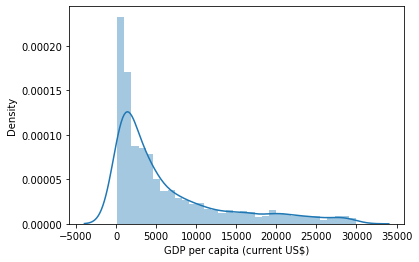

In [10]:
# Density plot of GDP pre capita
sns.distplot(countries_all_data["GDP per capita (current US$)"]);

This is a highly skewed distribution. Let us use log transformation on this column to see of that helps normalise the distribution.

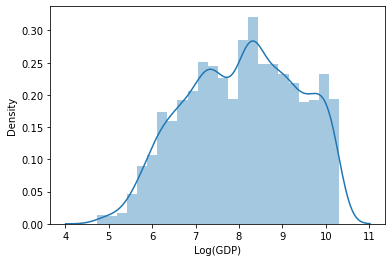

In [11]:
# Let us normalize GDP per capita
sns.distplot(np.log(countries_all_data["GDP per capita (current US$)"]), axlabel="Log(GDP)");

In [12]:
# Log Transformation has definitely helped in reducing the skew
# Creating a new column with the transformed variable.
countries_all_data["GDP_log"] = np.log(countries_all_data["GDP per capita (current US$)"])

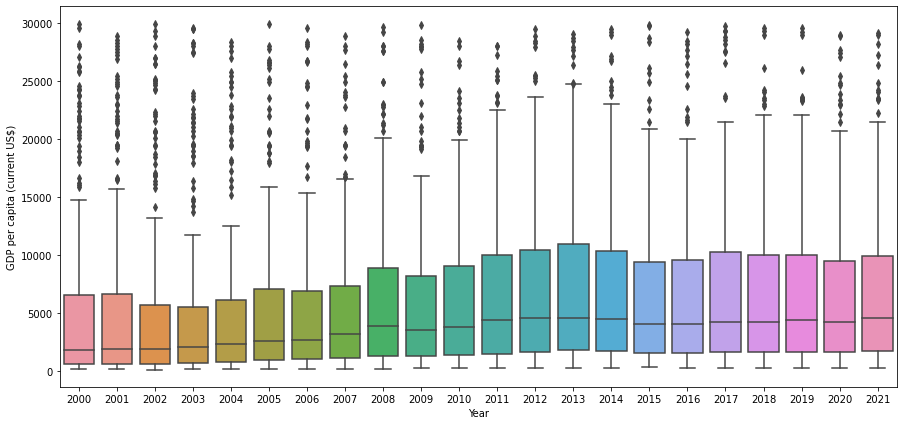

In [13]:
#GDP over the years
plt.figure(figsize=(15, 7))
sns.boxplot(x="Year", y="GDP per capita (current US$)", data=countries_all_data);

GDP per capita has a large IQR in the year 2008.

In [14]:
# Drop the redundant columns.
#countries_all_data.drop(columns=["GDP per capita (current US$)"], inplace=True)

In [15]:
# Drop the rows where 'GDP' == NaN and proceed to modelling
countries_all_data = countries_all_data[countries_all_data["GDP_log"].notna()]

## **Proposed approach**

**Potential techniques** :

Since it is a regression problem we will first start with the parametric model - linear regression,Ridge Regression followed by the non-parametric models - Decision Tree and Random Forest.

**Overall solution design** : 

The potential solution design would look like:
* Checking the data description to get the idea of basic statistics or summary of data.
* Univariate analysis to see how data is spread out, getting to about the outliers.
* Bivariate analysis to see how different attributes vary with the dependent variable.
* Outlier treatment if needed - In this case, outlier treatment is not necessary as outliers are the rich countries and we would want our predictive model to capture the underlying pattern for them.
* Missing value treatment using appropriate techniques.
* Feature engineering - transforming features, creating new features if possible.
* Choosing the model evaluation technique - 1) R Squared 2) RMSE , can be any other metrics related to regression analysis.
* Splitting the data and proceeding with modelling.
* Model tuning to see if the performance of the model can be improved further.

**Measures of success** :

R-squared and RMSE can be used as a measure of success.

R-squared: This will tell us how much variation our predictive model can explain in data.

RMSE: This will give us a measure of how far off the model is predicting the original values on average.

### Model Building

1. What we want to predict is the "GDP per Capita". We will use the normalized version 'GDP per capita' for modelling.
2. We are luck there are no categorical features for encoding.  
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

In [16]:
# shuffle the DataFrame rows
countries_all_data = countries_all_data.sample(frac = 1)
# define independent and dependent variables
ind_vars = countries_all_data.drop(["GDP per capita (current US$)","GDP_log", 'Country Name','Year' ], axis=1)
dep_var = countries_all_data[["GDP per capita (current US$)", "GDP_log"]]

In [17]:
ind_vars = ind_vars.iloc[:,1:].bfill().ffill()
ind_vars.head()

Indicator Name  ARI treatment (% of children under 5 taken to a health provider)  \
379                                                          90.0                  
3659                                                         13.0                  
2556                                                         13.0                  
4334                                                         13.0                  
1022                                                         40.3                  

Indicator Name  Access to clean fuels and technologies for cooking (% of population)  \
379                                                     97.100000                      
3659                                                    22.838281                      
2556                                                   100.000000                      
4334                                                     0.400000                      
1022                                                     3.200000                      

Indicator Name  Access to clean fuels and technologies for cooking, rural (% of rural population)  \
379                                                     92.300000                                   
3659                                                     9.564904                                   
2556                                                   100.000000                                   
4334                                                     0.300000                                   
1022                                                     0.100000                                   

Indicator Name  Access to clean fuels and technologies for cooking, urban (% of urban population)  \
379                                                     99.400000                                   
3659                                                    46.654024                                   
2556                                                   100.000000                                   
4334                                                     0.500000                                   
1022                                                     9.700000                                   

Indicator Name  Access to electricity (% of population)  \
379                                          100.000000   
3659                                          63.345981   
2556                                         100.000000   
4334                                           1.892501   
1022                                          12.744051   

Indicator Name  Access to electricity, rural (% of rural population)  \
379                                                    100.000000      
3659                                                    68.128528      
2556                                                   100.000000      
4334                                                     2.322304      
1022                                                     1.000000      

Indicator Name  Access to electricity, urban (% of urban population)  \
379                                                    100.000000      
3659                                                    90.373605      
2556                                                   100.000000      
4334                                                    20.311203      
1022                                                    37.732281      

Indicator Name  Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)  \
379                                                         58.60                                                                 
3659                                                        93.05                                                                 
2556                                                        93.05                                                                 
4334   

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size=0.2, random_state=1
)

In [19]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 3537
Number of rows in train data = 885


In [20]:
#Fitting a linear model - Linear Regression
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(x_train)
# Add constant to test data
x_test = sm.add_constant(x_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train['GDP_log'], train)
    return olsmodel.fit()


olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                GDP_log   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     315.7
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:37:55   Log-Likelihood:                 751.40
No. Observations:                3537   AIC:                            -686.8
Df Residuals:                    3129   BIC:                             1831.
Df Model:                         407                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-

* Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in price of used cars for upto 97% 
* The model is not an underfitting model.
* To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.
* Before we move on to assumption testing, we'll do a quick performance check on the test data.

In [21]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(model, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = model.predict(x_train)
    try:
        y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    except OverflowError:
        y_pred_train_Price = float('inf')
    y_train_Price = y_train["GDP per capita (current US$)"]

    # Prediction on test data
    y_pred_test_pricelog = model.predict(x_test)
    try:
        y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    except OverflowError:
        y_pred_test_Price = float('inf')
    y_test_Price = y_test["GDP per capita (current US$)"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, x_train, x_test)  # High Overfitting.

    Data         RMSE          MAE       MAPE
0  Train  2472.195346  1040.306554  14.729963
1   Test  4257.200896  1410.718004  24.193078


* Root Mean Squared Error of train and test data is starkly different, indicating that our model is overfitting the train data. 
* Mean Absolute Error indicates that our current model is overfitting as well
* Mean Absolute Percentage Error is ~43% on the test data.

## Checking the Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedasticity
4. Linearity of variables
5. Normality of error terms

### Checking Assumption 1: No Multicollinearity 

We will use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [23]:
vif_dicts= checking_vif(x_train)

In [24]:
# # Sort and consider only features with VIF 5 or less
#vif_dicts.sort_values('VIF', ascending = True).head(10)

In [25]:
# get list of columns 
ind_vars_cols = vif_dicts[vif_dicts['VIF'] < 3]['feature'].tolist()

print(len(ind_vars_cols))


106


In [26]:
# ind_vars_cols = ['Adequacy of social safety net programs (% of total welfare of beneficiary households)',
#  'Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)',
#  'Adjusted savings: mineral depletion (% of GNI)',
#  'Adjusted savings: mineral depletion (current US$)',
#  'Adjusted savings: net forest depletion (current US$)',
#  'Agricultural raw materials imports (% of merchandise imports)',
#  'Agriculture, forestry, and fishing, value added (annual % growth)',
#  'Agriculture, forestry, and fishing, value added per worker (constant 2015 US$)',
#  'Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)',
#  'Average transaction cost of sending remittances from a specific country (%)',
#  'Bank capital to assets ratio (%)',
#  'Bank nonperforming loans to total gross loans (%)',
#  'Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits)',
#  'Broad money growth (annual %)',
#  'Broad money to total reserves ratio',
#  'CPIA building human resources rating (1=low to 6=high)',
#  'CPIA business regulatory environment rating (1=low to 6=high)',
#  'CPIA debt policy rating (1=low to 6=high)',
#  'CPIA economic management cluster average (1=low to 6=high)',
#  'CPIA efficiency of revenue mobilization rating (1=low to 6=high)',
#  'CPIA equity of public resource use rating (1=low to 6=high)',
#  'CPIA financial sector rating (1=low to 6=high)',
#  'CPIA fiscal policy rating (1=low to 6=high)',
#  'CPIA gender equality rating (1=low to 6=high)',
#  'CPIA macroeconomic management rating (1=low to 6=high)',
#  'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
#  'CPIA policy and institutions for environmental sustainability rating (1=low to 6=high)',
#  'CPIA property rights and rule-based governance rating (1=low to 6=high)',
#  'CPIA public sector management and institutions cluster average (1=low to 6=high)',
#  'CPIA quality of budgetary and financial management rating (1=low to 6=high)',
#  'CPIA quality of public administration rating (1=low to 6=high)',
#  'CPIA social protection rating (1=low to 6=high)',
#  'CPIA structural policies cluster average (1=low to 6=high)',
#  'CPIA trade rating (1=low to 6=high)',
#  'CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)',
#  'Central government debt, total (% of GDP)',
#  'Central government debt, total (current LCU)',
#  'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
#  'Claims on central government (annual growth as % of broad money)',
#  'Claims on other sectors of the domestic economy (annual growth as % of broad money)',
#  'Claims on private sector (annual growth as % of broad money)',
#  'Coal rents (% of GDP)',
#  'Community health workers (per 1,000 people)',
#  'Consumer price index (2010 = 100)',
#  'Consumption of iodized salt (% of households)',
#  'Current education expenditure, tertiary (% of total expenditure in tertiary public institutions)',
#  'Disaster risk reduction progress score (1-5 scale; 5=best)',
#  'Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)',
#  'Electricity production from nuclear sources (% of total)',
#  'Electricity production from renewable sources, excluding hydroelectric (% of total)',
#  'Exports of goods and services (annual % growth)',
#  'Female genital mutilation prevalence (%)',
#  'Fertilizer consumption (% of fertilizer production)',
#  'Fertilizer consumption (kilograms per hectare of arable land)',
#  'Financial intermediary services indirectly Measured (FISIM) (constant LCU)',
#  'Firms that do not report all sales for tax purposes (% of firms)',
#  'Foreign direct investment, net outflows (% of GDP)',
#  'GHG net emissions/removals by LUCF (Mt of CO2 equivalent)',
#  'General government final consumption expenditure (annual % growth)',
#  'Grants, excluding technical cooperation (BoP, current US$)',
#  'Gross capital formation (annual % growth)',
#  'Gross fixed capital formation, private sector (% of GDP)',
#  'High-technology exports (% of manufactured exports)',
#  'Households and NPISHs Final consumption expenditure per capita growth (annual %)',
#  'IDA resource allocation index (1=low to 6=high)',
#  'IMF repurchases and charges (TDS, current US$)',
#  'Industry (including construction), value added (annual % growth)',
#  'Investment in ICT with private participation (current US$)',
#  'Lead time to export, median case (days)',
#  'Lead time to import, median case (days)',
#  'Manufacturing, value added (annual % growth)',
#  'Mineral rents (% of GDP)',
#  'Multidimensional poverty headcount ratio, household (% of total households)',
#  'Multidimensional poverty index (scale 0-1)',
#  'Multidimensional poverty index, children (population ages 0-17) (scale 0-1)',
#  'Multidimensional poverty intensity (average share of deprivations experienced by the poor)',
#  'Net ODA provided to the least developed countries (% of GNI)',
#  'Net ODA provided, total (% of GNI)',
#  'Net bilateral aid flows from DAC donors, Portugal (current US$)',
#  'Net financial flows, IMF concessional (NFL, current US$)',
#  'Net financial flows, IMF nonconcessional (NFL, current US$)',
#  'Net financial flows, others (NFL, current US$)',
#  'Net incurrence of liabilities, total (% of GDP)',
#  'Net official flows from UN agencies, UNECE (current US$)',
#  'Net official flows from UN agencies, UNEP (current US$)',
#  'Net official flows from UN agencies, UNRWA (current US$)',
#  'Net official flows from UN agencies, UNWTO (current US$)',
#  'Net primary income (Net income from abroad) (constant LCU)',
#  'New business density (new registrations per 1,000 people ages 15-64)',
#  'Newborns protected against tetanus (%)',
#  'Nitrous oxide emissions (% change from 1990)',
#  'Number of surgical procedures (per 100,000 population)',
#  'Official exchange rate (LCU per US$, period average)',
#  'Other greenhouse gas emissions (% change from 1990)',
#  'Other taxes (% of revenue)',
#  'PNG, bonds (NFL, current US$)',
#  'PPG, other private creditors (NFL, current US$)',
#  'People using safely managed drinking water services, rural (% of rural population)',
#  'Portfolio investment, net (BoP, current US$)',
#  'Primary government expenditures as a proportion of original approved budget (%)',
#  'Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)',
#  'Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)',
#  'Public credit registry coverage (% of adults)',
#  'Public private partnerships investment in ICT (current US$)',
#  'Real effective exchange rate index (2010 = 100)',
#  'Real interest rate (%)',
#  'Risk premium on lending (lending rate minus treasury bill rate, %)',
#  'S&P Global Equity Indices (annual % change)',
#  'Secure Internet servers (per 1 million people)',
#  'Services, value added (annual % growth)',
#  'Share of tariff lines with specific rates, all products (%)',
#  'Share of tariff lines with specific rates, manufactured products (%)',
#  'Share of tariff lines with specific rates, primary products (%)',
#  'Short-term debt (% of total reserves)',
#  'Stocks traded, turnover ratio of domestic shares (%)',
#  'Taxes on exports (% of tax revenue)',
#  'Time spent dealing with the requirements of government regulations (% of senior management time)',
#  'Total reserves (% of total external debt)',
#  'Tuberculosis treatment success rate (% of new cases)',
#  'Use of insecticide-treated bed nets (% of under-5 population)',
#  'Vitamin A supplementation coverage rate (% of children ages 6-59 months)',
#  'Wholesale price index (2010 = 100)']

Let us check out a sample about their correlations

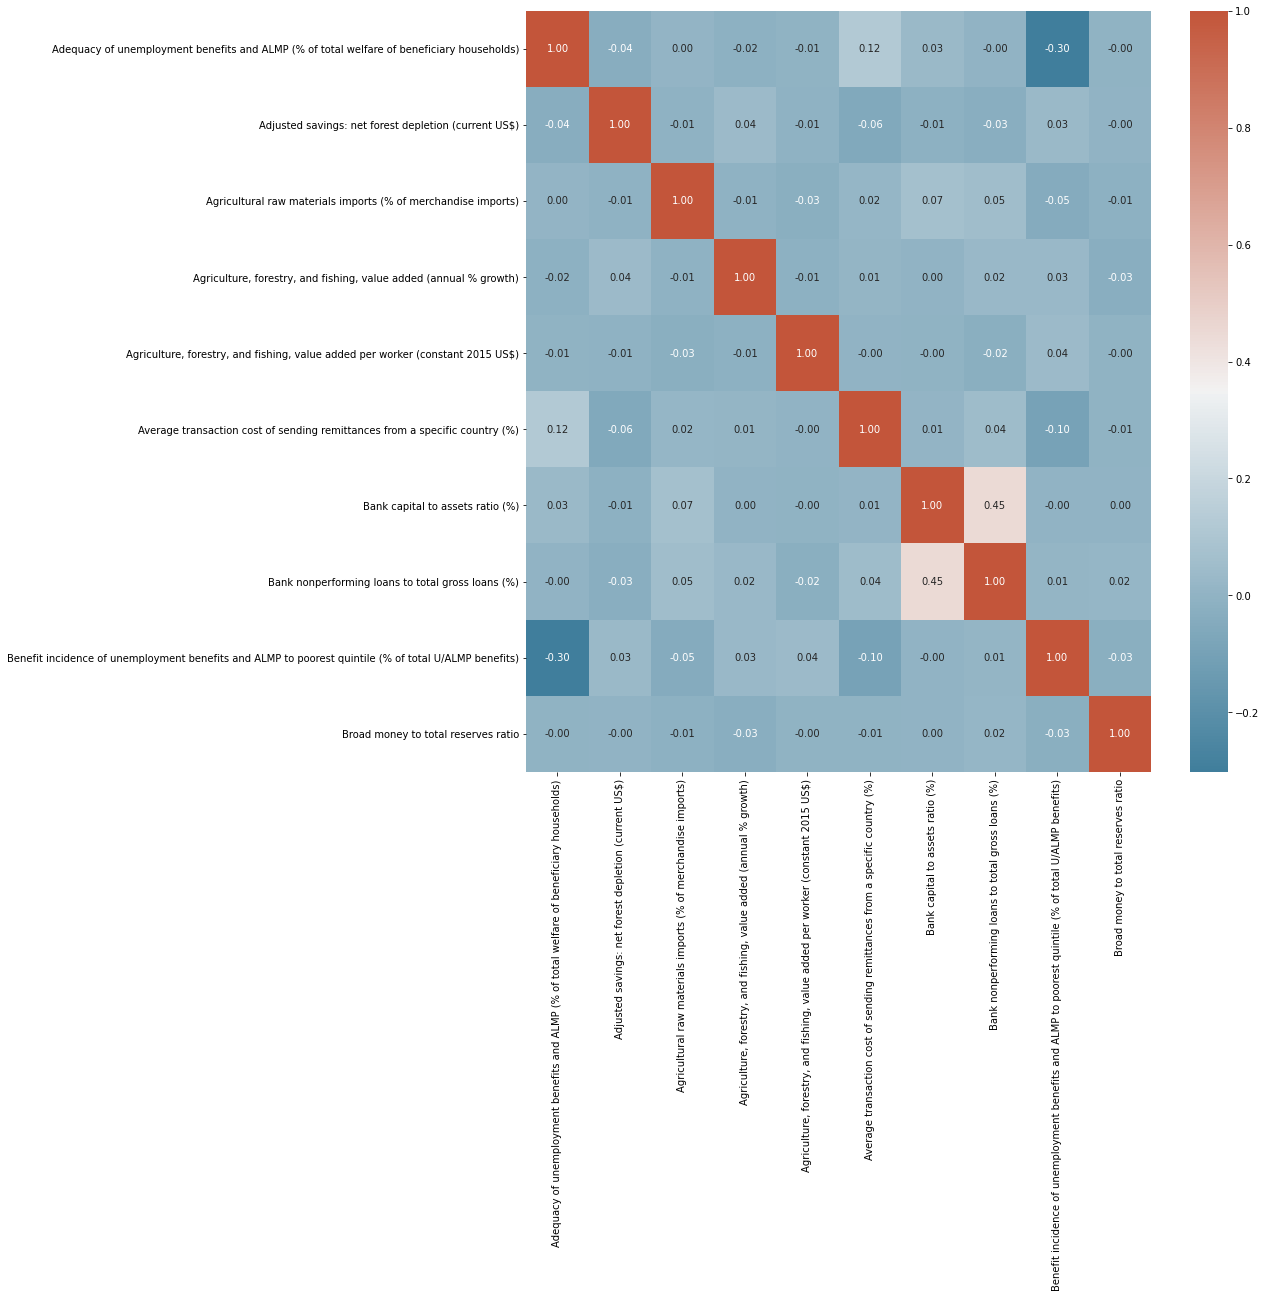

In [27]:
plt.figure(figsize=(14,14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(x_train[ind_vars_cols[:10]].corr(),annot=True,fmt='.2f',cmap=cmap )
plt.show()

### Removing Multicollinearity
 * To remove multicollinearity
  1. Drop every column that has VIF score greater than 5, one by one.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 3

In [28]:
# Method to drop all the multicollinear column and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        olsres = build_ols_model(train)
        # Adj R-Sq
        adj_rsq_scores.append(olsres.rsquared_adj)
        # RMSE (Test data)
        y_pred_test_pricelog = olsres.predict(test)
        y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
        y_test_Price = y_test["GDP_log"]
        rmse_test_data.append(rmse(y_pred_test_Price, y_test_Price))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)
    print("\n\n")


In [29]:
#Let's look at the model with the data that does not have multicollinearity
# Fit linear model on new dataset
olsmodel3 = build_ols_model(x_train[ind_vars_cols])
print(olsmodel3.summary())

print("\n\n")

# Checking model performance
model_pref(olsmodel3, x_train[ind_vars_cols], x_test[ind_vars_cols])

                            OLS Regression Results                            
Dep. Variable:                GDP_log   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     19.98
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          4.73e-272
Time:                        21:59:02   Log-Likelihood:                -5037.0
No. Observations:                3537   AIC:                         1.028e+04
Df Residuals:                    3434   BIC:                         1.092e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Model R-squared and Adjusted R squared has reduced as compared to the previous model - olsmodel1.
Removal of multicollinear variable has not causes any information loss in the model but has also helped us to get rid of overfitting.

Before we can make inferences from this model, let us ensure that other model assumptions are followed.

### Checking Assumption 2: Mean of residuals should be 0

In [30]:
residuals = olsmodel3.resid
np.mean(residuals)

-5.6566965905070865e-05

Mean of redisuals is very close to 0. The second assumption is also satisfied.

### Checking Assumption 3: No Heteroscedasticity

* Homoscedacity - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

We'll use `Goldfeldquandt Test` to test the following hypothesis

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity

alpha = 0.05

In [31]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 1.4423974121441023), ('p-value', 7.681989033190195e-12)]

Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic. 

Assumptions 3 is also satisfied by our olsmodel3.

### Checking Assumption 4: Linearity of variables

Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x axis.

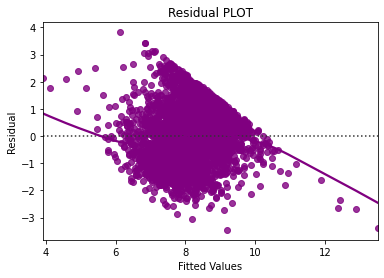

In [32]:
# predicted values
fitted = olsmodel3.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(fitted, residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Assumptions 4 is satisfied by our olsmodel3. There is no pattern in the residual vs fitted values plot.

### Checking Assumption 5: Normality of error terms

The residuals should be normally distributed.

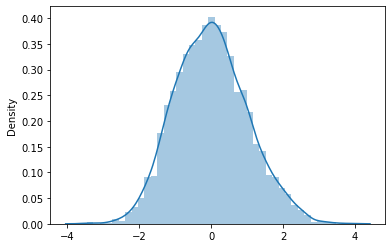

In [33]:
# Plot histogram of residuals
sns.distplot(residuals);

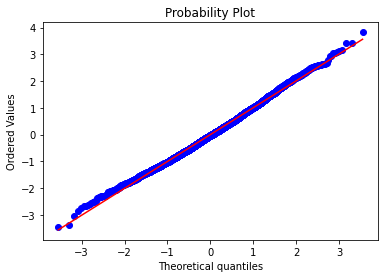

In [34]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

The residuals have a close to normal distribution. Assumption 5 is also satisfied. We should further investigate these values in the tails where we have made huge residual errors.

Now that we have seen that olsmodel3 follows all the linear regression assumptions. Let us use that model to draw inferences.

In [35]:
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:                GDP_log   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     19.98
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          4.73e-272
Time:                        21:59:13   Log-Likelihood:                -5037.0
No. Observations:                3537   AIC:                         1.028e+04
Df Residuals:                    3434   BIC:                         1.092e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Observations from the model
* Its clear from this model that Adequacy of social safety net programs (% of total welfare of beneficiary households), Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households) and Adjusted savings: mineral depletion (% of GNI) are the top features of importance.


## Add-on: Analyzing predictions where we were way off the mark

In [36]:
# Extracting the rows from original data frame df where indexes are same as the training data
original_df = countries_all_data[countries_all_data.index.isin(x_train.index.values)].copy()

# Extracting predicted values from the final model
residuals = olsmodel3.resid
fitted_values = olsmodel3.fittedvalues

# Add new columns for predicted values
original_df["Predicted gdp_log "] = fitted_values
original_df["Predicted Gdp"] = fitted_values.apply(math.exp)
original_df["residuals"] = residuals
original_df["Abs_residuals"] = residuals.apply(math.exp)
original_df["Difference in dollar"] = np.abs(
    original_df["GDP per capita (current US$)"] - original_df["Predicted Gdp"]
)

# Let us look at the top 20 predictions where our model made highest extimation errors (on train data)
original_df.sort_values(by=["Difference in dollar"], ascending=False).head(30)

Indicator Name  index               Country Name  Year  \
4957             4957   Turks and Caicos Islands  2007   
4206             4206                  Singapore  2004   
4205             4205                  Singapore  2003   
4176             4176                 Seychelles  2018   
4289             4289                   Slovenia  2021   
4288             4288                   Slovenia  2020   
174               174                  Argentina  2020   
171               171                  Argentina  2017   
3738             3738                     Panama  2020   
4244             4244  Sint Maarten (Dutch part)  2020   
215               215                      Aruba  2017   
4226             4226  Sint Maarten (Dutch part)  2002   
4243             4243  Sint Maarten (Dutch part)  2019   
4233             4233  Sint Maarten (Dutch part)  2009   
1184             1184                     Cyprus  2018   
213               213                      Aruba  2015   
2335             2335                Isle of Man  2003   
1878             1878                       Guam  2008   
4232             4232  Sint Maarten (Dutch part)  2008   
3939             3939                      Qatar  2001   
4229             4229  Sint Maarten (Dutch part)  2005   
4237             4237  Sint Maarten (Dutch part)  2013   
4235             4235  Sint Maarten (Dutch part)  2011   
4242             4242  Sint Maarten (Dutch part)  2018   
4234             4234  Sint Maarten (Dutch part)  2010   
4225             4225  Sint Maarten (Dutch part)  2001   
1876             1876                       Guam  2006   
1813             1813                     Greece  2009   
205               205                      Aruba  2007   
4231             4231  Sint Maarten (Dutch part)  2007   

Indicator Name  ARI treatment (% of children under 5 taken to a health provider)  \
4957                                                          NaN                  
4206                                                          NaN                  
4205                                                          NaN                  
4176                                                          NaN                  
4289                                                          NaN                  
4288                                                          NaN                  
174                                                     94.300000                  
171                                                     94.300000                  
3738                                                    81.600000                  
4244                                                          NaN                  
215                                                           NaN                  
4226                                                          NaN                  
4243                                                          NaN                  
4233                                                          NaN                  
1184                                                          NaN                  
213                                                           NaN                  
2335                                                    75.343074                  
1878                                                          NaN                  
4232                                                          NaN                  
3939                                                          NaN                  
4229                                                          NaN                  
4237                                                          NaN                  
4235                                                          NaN                  
4242                                                          NaN                  
4234                                                          NaN                  
4225             

## Observation
* Its clear that our model is affected by countries that are so rich or have achieved richness in a short amount of time. 

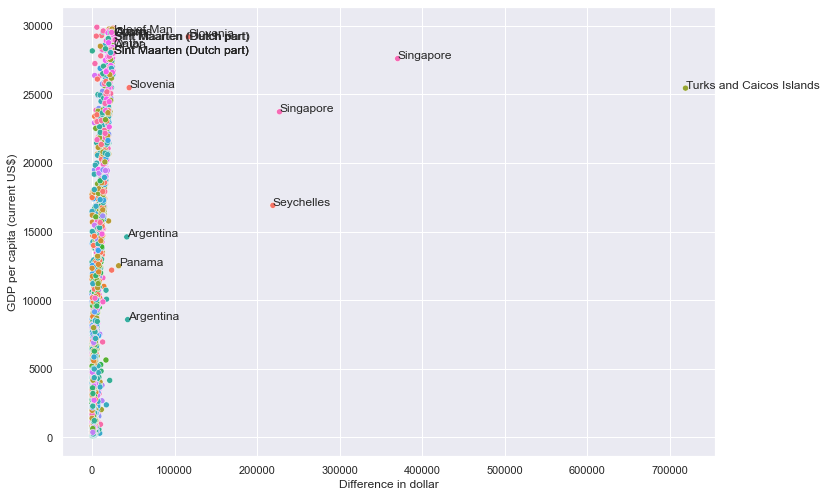

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(
    original_df["Difference in dollar"],
    original_df["GDP per capita (current US$)"],
    hue=original_df["Country Name"],legend = False
);
# Annotate label points
#Filter outliers
top_20 = original_df.nlargest(20, 'Difference in dollar')
for index, row in top_20.iterrows():
    plt.annotate(row['Country Name'], xy=(row['Difference in dollar'], row['GDP per capita (current US$)']), xytext=(row['Difference in dollar']+0.2, row['GDP per capita (current US$)']+0.2))

Most outliers are the rich countries. Perhaps most surprising is Seychelles in Africa.

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#x_train = scaler.fit_transform(x_train)

#x_test = scaler.transform(x_test)
X_train = x_train[ind_vars_cols]
#X_train = scaler.fit_transform(X_train)
X_test = x_test[ind_vars_cols]
#X_test = scaler.transform(X_test)

In [39]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    """
    model : regressor to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)

    train_r2 = metrics.r2_score(y_train["GDP per capita (current US$)"], pred_train_)
    test_r2 = metrics.r2_score(y_test["GDP per capita (current US$)"], pred_test_)
    train_rmse = metrics.mean_squared_error(
        y_train["GDP per capita (current US$)"], pred_train_, squared=False
    )
    test_rmse = metrics.mean_squared_error(y_test["GDP per capita (current US$)"], pred_test_, squared=False)

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print(
            "R-sqaure on training set : ",
            metrics.r2_score(y_train["GDP per capita (current US$)"], pred_train_),
        )
        print("R-square on test set : ", metrics.r2_score(y_test["GDP per capita (current US$)"], pred_test_))
        print(
            "RMSE on training set : ",
            np.sqrt(metrics.mean_squared_error(y_train["GDP per capita (current US$)"], pred_train_)),
        )
        print(
            "RMSE on test set : ",
            np.sqrt(metrics.mean_squared_error(y_test["GDP per capita (current US$)"], pred_test_)),
        )

    # returning the list with train and test scores
    return score_list

### *Ridge Regression*

In [40]:
rdg = Ridge()
rdg.fit(X_train, y_train["GDP_log"])

Ridge()

In [41]:
Ridge_score = get_model_score(rdg)

R-sqaure on training set :  -3.980325717844541
R-square on test set :  -9.269945569024383
RMSE on training set :  16220.808980064063
RMSE on test set :  22921.264681847355


***Observation***

Since R2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis), it does look like  the chosen model fits worse than a horizontal line, implying that R2 is negative. This implies that the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

### Decision Tree

In [42]:
dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train["GDP_log"])
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  1.0
R-square on test set :  0.5302414061279123
RMSE on training set :  5.098423525521833e-12
RMSE on test set :  4902.209556154335


#### Observations
* Decision Tree is overfitting on the training set and hence not able to generalize well on the test set.

In [43]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False))

                                                         Imp
Secure Internet servers (per 1 million people)      0.543089
Agriculture, forestry, and fishing, value added...  0.173668
Official exchange rate (LCU per US$, period ave...  0.024991
Nitrous oxide emissions (% change from 1990)        0.017707
Total reserves (% of total external debt)           0.013118
Consumer price index (2010 = 100)                   0.013099
CPIA macroeconomic management rating (1=low to ...  0.012024
Fertilizer consumption (kilograms per hectare o...  0.011283
Tuberculosis treatment success rate (% of new c...  0.010138
Agricultural raw materials imports (% of mercha...  0.009339
Adjusted savings: net forest depletion (current...  0.007529
Lead time to export, median case (days)             0.007318
Vitamin A supplementation coverage rate (% of c...  0.006582
Public credit registry coverage (% of adults)       0.006190
Primary government expenditures as a proportion...  0.005709
Share of tariff lines wi

#### Observations
* Secure Internet, Agriculture forestry and fishing and Official exchange rate are the top 3 important features of decision tree model.

### Random Forest


In [44]:
rf = RandomForestRegressor(random_state=1, oob_score=True)
rf.fit(X_train, y_train["GDP_log"])
RandomForest_model = get_model_score(rf)

R-sqaure on training set :  0.9455590504006699
R-square on test set :  0.7676473094723085
RMSE on training set :  1695.92437593196
RMSE on test set :  3447.691182355513


#### Observations
* Random Forest model has performed well on training and test set and we can see the model has overfitted slightly.

**Feature Importance**

In [45]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        rf.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False))

                                                         Imp
Secure Internet servers (per 1 million people)      0.550859
Agriculture, forestry, and fishing, value added...  0.165390
Official exchange rate (LCU per US$, period ave...  0.025511
Consumer price index (2010 = 100)                   0.019077
Nitrous oxide emissions (% change from 1990)        0.012459
Fertilizer consumption (kilograms per hectare o...  0.011586
Total reserves (% of total external debt)           0.010027
Agricultural raw materials imports (% of mercha...  0.008282
High-technology exports (% of manufactured expo...  0.008263
Tuberculosis treatment success rate (% of new c...  0.007396
Broad money to total reserves ratio                 0.007360
Public credit registry coverage (% of adults)       0.006015
Adjusted savings: net forest depletion (current...  0.005939
Current education expenditure, tertiary (% of t...  0.004499
CPIA macroeconomic management rating (1=low to ...  0.004471
Lead time to import, med

Does cross validation help ?

In [46]:
# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model using Sklearn Linear regression
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train['GDP_log'], cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train['GDP_log'], cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: -7892074.670 (+/- 47352449.885)
Mean Squared Error: 12645770.643 (+/- 75874617.213)


### Hyperparameter Tuning - Decision Tree

In [47]:
# Choose the type of regressor.
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(2, 25, 5)) + [None],
    "min_samples_leaf": [1, 3, 5, 7],
    "max_leaf_nodes": [2, 5, 7] + [None],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train["GDP_log"])

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train["GDP_log"])

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3, random_state=1)

In [48]:
dtree_tuned_score = get_model_score(dtree_tuned)

R-sqaure on training set :  0.752573790454298
R-square on test set :  0.6638751553228364
RMSE on training set :  3615.484362616655
RMSE on test set :  4146.720965806803


#### Observations
* Overfitting in decision tree is still there.

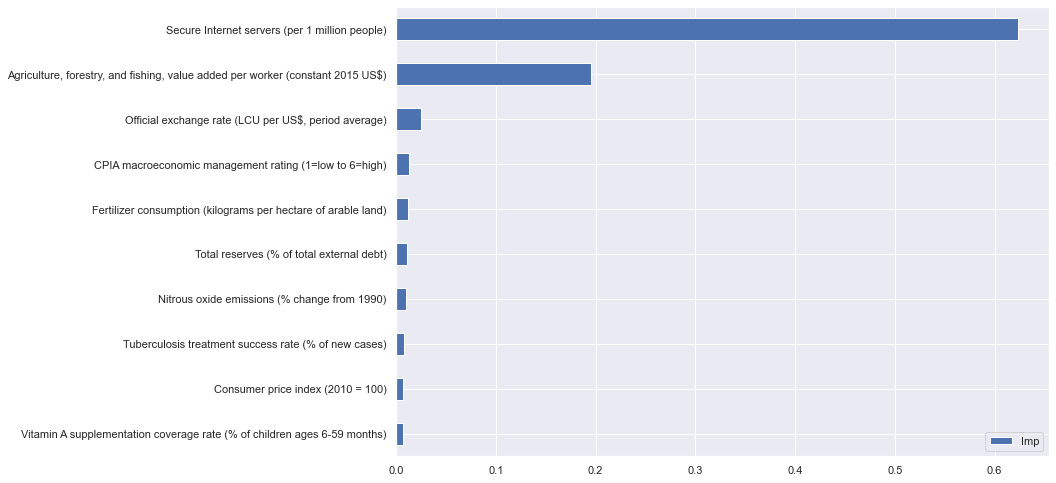

In [49]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

pd.DataFrame(dtree_tuned.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False).head(10).plot(kind='barh');
plt.gca().invert_yaxis()


#### Observations
* Secure Internet, Agriculture forestry and fishing and Official exchange rate are the top 3 important features of decision tree model.

### Hyperparameter Tuning - Random Forest

In [50]:
# Choose the type of regressor
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 6],
    "max_features": ["sqrt", "log2"],
    "n_estimators": [300, 500, 900, 1000],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train["GDP_log"])

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train["GDP_log"])

RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=500,
                      random_state=1)

In [51]:
rf_tuned_score = get_model_score(rf_tuned)

R-sqaure on training set :  0.452716080995445
R-square on test set :  0.41376135732919206
RMSE on training set :  5377.123114273692
RMSE on test set :  5476.356679368481


#### Observations
* There's still scope for improvement with tuning the hyperparameters of the Random Forest.

**Feature Importance**

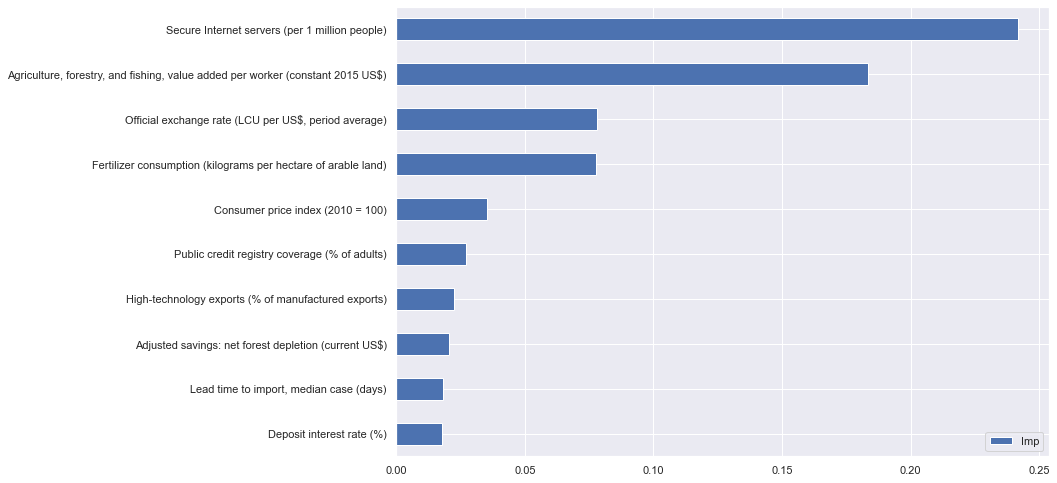

In [52]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10).plot(kind='barh')
plt.gca().invert_yaxis()


In [53]:
# defining list of models
models = [rdg, dtree, dtree_tuned, rf, rf_tuned]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model, False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [54]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Ridge Regression",
            "Decision Tree",
            "Tuned Decision Tree",
            "Random Forest",
            "Tuned Random Forest",
        ],
        "Train_r2": r2_train,
        "Test_r2": r2_test,
        "Train_RMSE": rmse_train,
        "Test_RMSE": rmse_test,
    }
)
comparison_frame

Model  Train_r2   Test_r2    Train_RMSE     Test_RMSE
0     Ridge Regression -3.980326 -9.269946  1.622081e+04  22921.264682
1        Decision Tree  1.000000  0.530241  5.098424e-12   4902.209556
2  Tuned Decision Tree  0.752574  0.663875  3.615484e+03   4146.720966
3        Random Forest  0.945559  0.767647  1.695924e+03   3447.691182
4  Tuned Random Forest  0.452716  0.413761  5.377123e+03   5476.356679

* Ridge Regression and Linear Regression have performed relatively bad on the data. However, tuned Decision tree and Random forests have performed better on training and test set.There is a slight overfitting,if we can tune it better we can remove it.

### Regression Analysis

- In this segment, we provide an empirical example of using partialling-out with Lasso to estimate the regression coefficient $β_1$ in the high-dimensional linear regression model:

- For any inference question, we can write Y as Y = $β_1D$ + $β^r_2W$ + ε.

- Specifically we are interested in how the rates at which economies of different countries grow, denoted by Y , are related to the initial wealth levels in each country, denoted by D, controlling for country’s institutional, educational, and other similar characteristics, denoted by W.

- The relationship is captured by the regression coefficient $β_1$.

- In this example, this coefficient is called the “speed of convergence/divergence”, as it measures the speed at which poor countries catch up ($β_1$<0) or fall ($β_1$>0) behind wealthy countries, controlling for W .

- Our inference question here is: **do poor countries grow faster than rich countries?** In other words, is the speed of convergence negative: $β_1$<0?
- This is the Convergence Hypothesis predicted by the Solow Growth Model